# Step 1 - Importation des librairies et modules essentiels 

In [5]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Input,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.datasets import mnist 

# Step 2 - Importation du dataset

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


In [29]:
print('Avant normalisation : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('Aprés normalisation  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Avant normalisation : Min=0, max=255
Aprés normalisation  : Min=0.0, max=1.0


In [30]:
import pwk

# les Images 

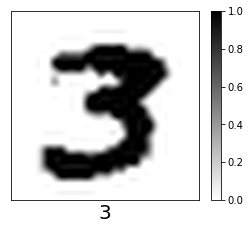

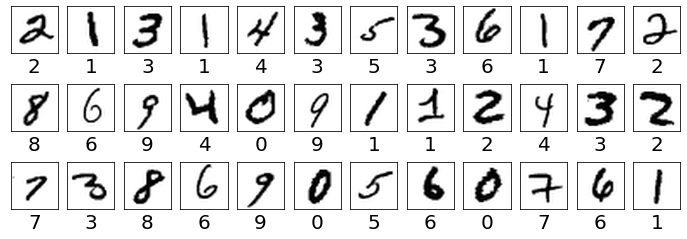

In [31]:
pwk.plot_images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
pwk.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

# Step 4 - Creation du model

In [14]:
model = keras.models.Sequential()

model.add(Input((28,28,1)) )

model.add(Conv2D(8, (3,3),  activation='relu') )
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(16, (3,3), activation='relu') )
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten()) 
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 16)          0

# Step 5 - Entrainement du model

In [17]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16
118/118 [==============================] - 13s 97ms/step - loss: 1.1169 - accuracy: 0.6427 - val_loss: 0.2816 - val_accuracy: 0.9308
Epoch 2/16
118/118 [==============================] - 11s 90ms/step - loss: 0.3937 - accuracy: 0.8783 - val_loss: 0.1501 - val_accuracy: 0.9585
Epoch 3/16
118/118 [==============================] - 11s 94ms/step - loss: 0.2769 - accuracy: 0.9168 - val_loss: 0.1098 - val_accuracy: 0.9671
Epoch 4/16
118/118 [==============================] - 10s 88ms/step - loss: 0.2271 - accuracy: 0.9313 - val_loss: 0.0886 - val_accuracy: 0.9728
Epoch 5/16
118/118 [==============================] - 11s 96ms/step - loss: 0.1993 - accuracy: 0.9393 - val_loss: 0.0778 - val_accuracy: 0.9753
Epoch 6/16
118/118 [==============================] - 11s 94ms/step - loss: 0.1823 - accuracy: 0.9454 - val_loss: 0.0686 - val_accuracy: 0.9781
Epoch 7/16
118/118 [==============================] - 11s 92ms/step - loss: 0.1689 - accuracy: 0.9488 - val_loss: 0.0634 - val_accuracy:

# Step 6 - Evaluation du model 
## 6.1 - Valeur minimale de la fonction cout et precision 
<font color = 'red'>Note : With a DNN, we had a precision of the order of : 97.7%</font>

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.0389
Test accuracy : 0.9864


## 6.2 - Plot history

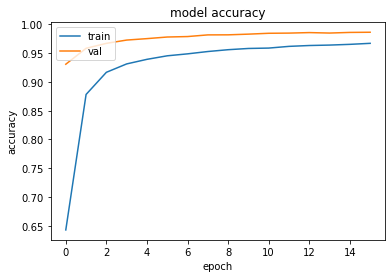

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

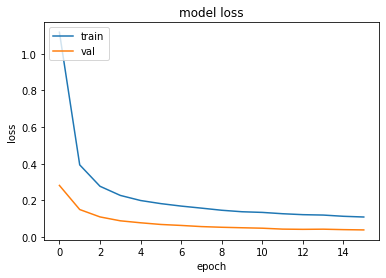

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 6.3 - Plot des resultats

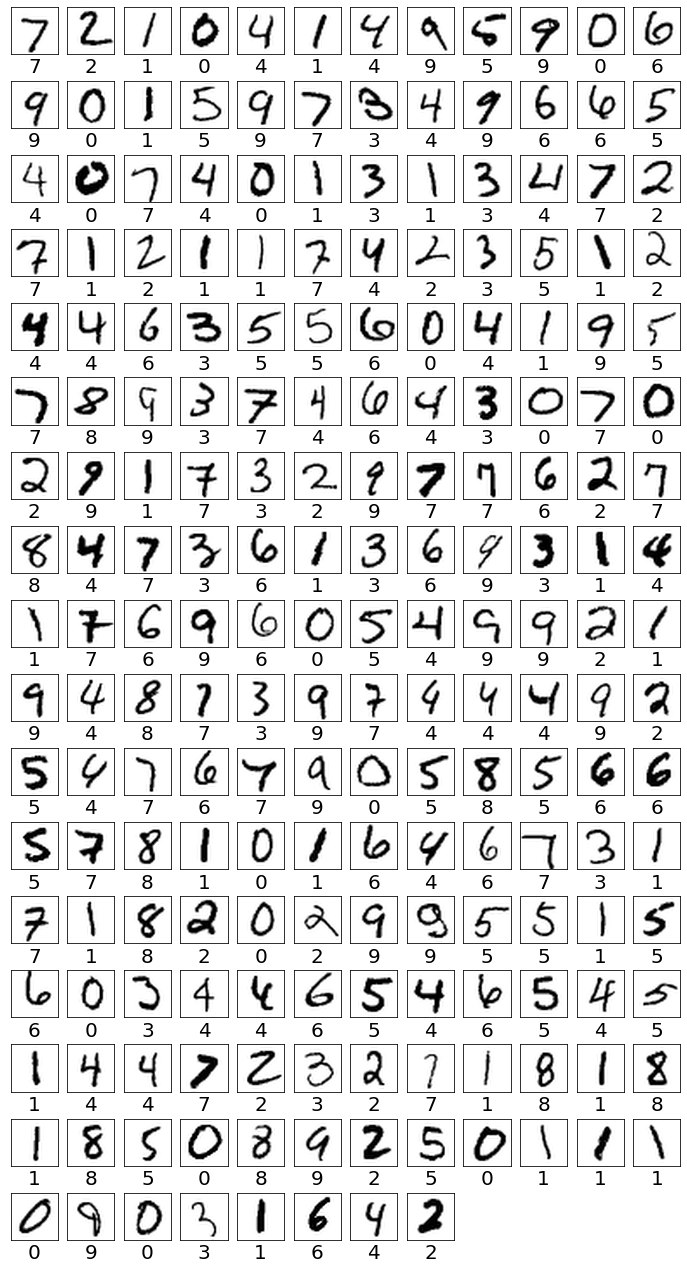

In [32]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

pwk.plot_images(x_test,
                y_test,
                range(0,200),
                columns=12,
                x_size=1,
                y_size=1,
                y_pred=y_pred, save_as='04-predictions')

## 6.4 - Plot quelques erreurs

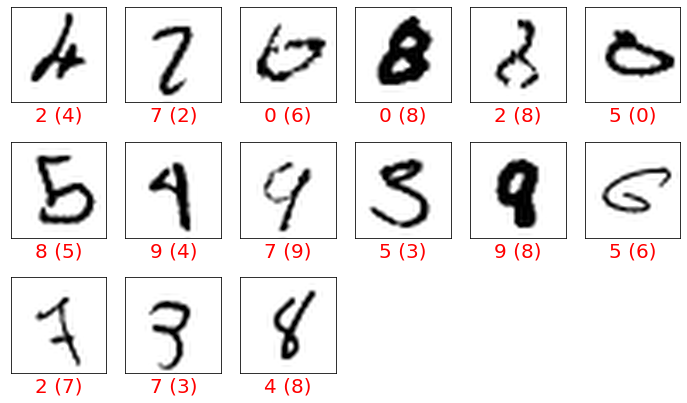

In [33]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
pwk.plot_images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

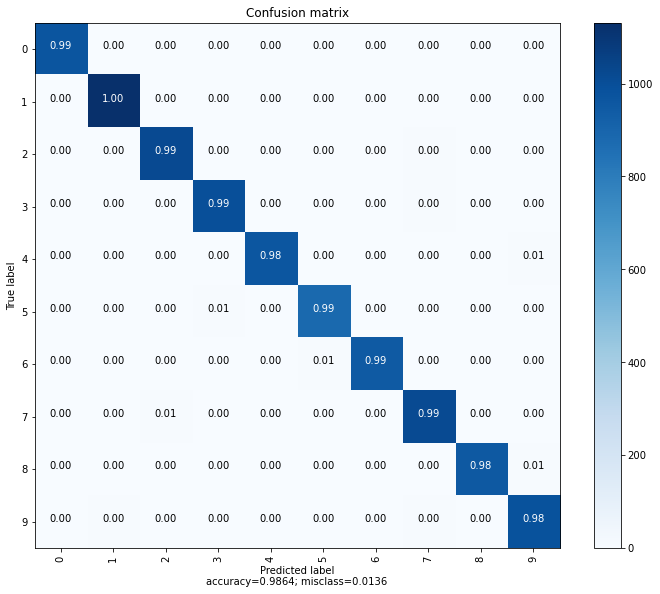

In [34]:
pwk.plot_confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')